<a href="https://colab.research.google.com/github/CarlosRafael22/ENEM2019Analysis/blob/main/ENEM2019Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse notebook tem o objetivo de praticar conceitos aprendidos na Imersão Dados da Alura e explorar mais as principais bibliotecas usadas para análises em Ciência de Dados. Utilizaremos parte dos dados reais do ENEM 2019 que foram previamente extraídos para serem utilizados durante a semana de imersão.

Para fazermos análises sobre os dados, listamos 4 hipóteses as quais, além de rejeitarmos ou falharmos a rejeitar de acordo com o que for demonstrado, nos ajudarão a mostrar algumas diferenças sociais no Brasil e a explorar mais algumas questões.

Esse notebook está dividido em 3 partes: a listagem das hipóteses, a limpagem dos dados para poder serem utilizados no estudo e as demonstração para cada uma das hipóteses.

------------------------------------------------------------------------------

This notebook aims to practice concepts learned in Alura's Data Immersion and further explore the main libraries used for data science analysis. We will use part of the actual ENEM(Brazilian national exam) 2019 data that was previously extracted to be used during the immersion week.

In order to analyze the data, we list 4 hypotheses which, in addition to rejecting or failing to reject according to what has been demonstrated, will help us to show some social differences in Brazil and to explore some more issues.

This notebook is divided into 3 parts: the list of hypotheses, the cleaning of data to be used in the study and the demonstrations for each hypothesis.

**Hipotéses levantadas**

1) Nota dos alunos de escolas rurais são menores que as de urbanas
  (Grades from students coming from rural schools are lower than urban schools)

2) Há uma grande discrepância entre as notas de alunos de escolas públicas e privadas
  (There is a big gap between grades from students coming from public and private schools)

3) As escolas com administração federal tem as melhores notas entre as públicas
  (Schools which has federal administration have better grades among public schols)

4) Quanto maior o grau de instrução dos pais maior a nota do candidato
  (The higher the parents' education level the higher the student's grade)


# TRATAMENTO DOS DADOS

Antes de começarmos a explorar cada uma das hipóteses iremos primeiro conhecer um pouco mais sobre a estruturação dos dados disponíveis e limitar a quantidade de colunas para somente as que tenham informações que serão úteis às análises.

Before we begin to explore each one of the hypothesis, first we are going to know a little bit about the structure of the available data and limit the columns to the ones which have useful information for our analysis.

**Importando as libs e base de dados - Importing libs and dataset**



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



source = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
data = pd.read_csv(source)

**Conhecendo um pouco a base de dados - Getting to know the dataset**

In [ ]:
data.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [ ]:
(lines, columns) = data.shape

print(f'O dataset possui {lines} linhas e {columns} colunas')
print(f'The dataset has {lines} lines and {columns} columns')

O dataset possui 127380 linhas e 136 colunas
The dataset has 127380 lines and 136 columns


**Restringindo as colunas para somente as que serão necessárias - Limiting the columns to the ones that will be used**

In [ ]:
exams = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
school_info = ['TP_ESCOLA', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']
participant_info = ['TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'IN_TREINEIRO', 'SG_UF_RESIDENCIA']
social_info = ['Q001', 'Q002', 'Q006']

columns = [*exams, *school_info, *participant_info, *social_info]

data = data[columns]
data.head()
# data.dropna(subset=['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'])

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,SG_UF_RESIDENCIA,Q001,Q002,Q006
0,435.6,512.3,432.4,488.6,420.0,1,NaN,NaN,M,3,3,1,PA,B,B,B
1,NaN,409.3,NaN,375.3,400.0,1,NaN,NaN,M,3,1,0,PA,C,C,B
2,423.2,499.1,427.2,441.0,560.0,1,NaN,NaN,F,1,1,0,PA,C,A,C
3,426.2,578.1,499.9,551.5,500.0,1,NaN,NaN,F,3,1,0,PA,E,C,B
4,516.5,571.3,424.5,511.2,780.0,1,NaN,NaN,F,3,3,1,PA,E,E,E




```
Limitando as colunas para as que somente vamos usar facilita a visualização dos dados.
Como podemos ver, existem algumas colunas com valores de NaN que poderemos filtrá-los mais na frente quando a ausência desses valores for decisiva para a análise de algumas das hipóteses.

Limiting the columns to the ones we are going to use to make it easier to visualize.
As we can see, there are some columns with NaN values which we can filter them out later when its absence will be decisive to analyse some of the hypothesis.
```



**Removendo participantes que são treineiros - Removing participants only practing the exam**

Vamos só considerar os participantes que estão efetivamente fazendo o ENEM para entrar na universidade para podermos avaliar melhor as notas já que os treineiros podem ter feito a prova sem ter estudado como os que realmente querem entrar na universidade.

We are only considering the participants who are effectively doing the ENEM exam to enter university for us to assess the grades better since participants who are training could have done the exam without studying like the ones who are really wanting to go to university.

In [ ]:
# Removing participants who are only doing the exam to practice
data = data.query('IN_TREINEIRO == 0')
data.shape

(111979, 16)

**Adicionando a coluna com as notas totais - Adding a column with the total grade**

Esse coluna vai ser necessária para podermos avaliar o desempenho geral do participante já que não possuímos a nota final do exame na base de dados.

This column is needed for us to assess the participant's overall perfomance since we dont have the exam's final grade for each participant in the dataset.

In [ ]:
data['NU_NOTA_TOTAL'] = data[exams].sum(axis=1)
data.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,SG_UF_RESIDENCIA,Q001,Q002,Q006,NU_NOTA_TOTAL
1,NaN,409.3,NaN,375.3,400.0,1,NaN,NaN,M,3,1,0,PA,C,C,B,1184.6
2,423.2,499.1,427.2,441.0,560.0,1,NaN,NaN,F,1,1,0,PA,C,A,C,2350.5
3,426.2,578.1,499.9,551.5,500.0,1,NaN,NaN,F,3,1,0,PA,E,C,B,2555.7
5,559.6,618.7,615.6,607.5,900.0,2,4.0,1.0,F,3,2,0,PA,D,E,C,3301.4
6,391.3,468.7,441.9,537.6,760.0,1,NaN,NaN,F,3,1,0,PA,H,H,C,2599.5




```
Com as colunas que não serão usadas agora retiradas e com a coluna com a nota total a mais nós podemos começar a avaliar as hipóteses.

With the removal of the non used columns and the addition of total grade column we are able to start evaluating the hypothesis.
```



# Hipótese 1: Notas dos alunos de escolas rurais são menores que as de urbanas

Para podermos avaliar essa hipótese temos que só considerar os dados de participantes que não têm a informação de TP_LOCALIZACAO_ESC como NaN. Como a quantidade de linhas do dataframe que não têm essa informação é grande vamos ver uma enorme redução nos dados para análise.

For us to evaluate the hypothesis we must only consider participant's data which doesn't have TP_LOCALIZACAO_ESC as NaN. Since the amount of lines of the dataframe which doesn't have this information is big we are going to see a great reduction of the data to analyse.

In [ ]:
(lines, _) = data.shape
print(f'O dataset possui {lines} linhas')
print(f'The dataset has {lines} lines')

data_with_school_location = data.dropna(subset=['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'])
data_with_school_location

(lines_with_location, columns_with_location) = data_with_school_location.shape
reduction = round(1 - lines_with_location / lines, 2) * 100
print(f'O dataset com dados de localizacao da escola possui {lines_with_location} linha. Redução de {reduction} %.')
print(f'The dataset with school location has {lines_with_location} lines. Reduction of {reduction} %.')

O dataset possui 111979 linhas
The dataset has 111979 lines
O dataset com dados de localizacao da escola possui 28627 linha. Redução de 74.0 %.
The dataset with school location has 28627 lines. Reduction of 74.0 %.


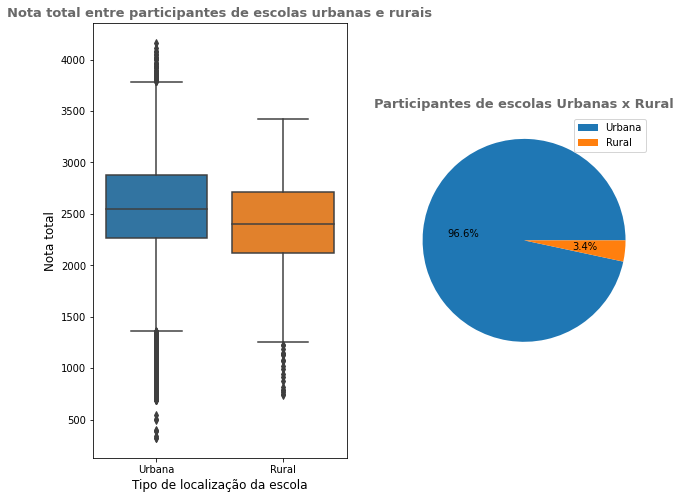

In [ ]:
# Removing participants with 0 total grades
data_with_school_location = data_with_school_location.query('NU_NOTA_TOTAL != 0')

# CREATING TWO PLOTS IN THE SAME FIGURE
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))

# CREATING FIRST PLOT
sns.boxplot(data=data_with_school_location, x=data_with_school_location['TP_LOCALIZACAO_ESC'], y=data_with_school_location['NU_NOTA_TOTAL'], ax=ax1)
ax1.set_title('Nota total entre participantes de escolas urbanas e rurais', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1.set_xticklabels(['Urbana', 'Rural'])
ax1.set_xlabel('Tipo de localização da escola', size=12)
ax1.set_ylabel('Nota total', size=12)

# CREATING SECOND PLOT
labels = ['Urbana', 'Rural']
ax2.set_title('Participantes de escolas Urbanas x Rural', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax2.pie(data_with_school_location['TP_LOCALIZACAO_ESC'].value_counts(), autopct='%1.1f%%')
ax2.legend(labels)

**CONCLUSÃO**

Mesmo havendo uma enorme diferença na quantidade de participantes que vieram de escolas rurais com os que vieram de urbanas, os **participantes de escolas urbanas realmente têm notas totais maiores**.

Even though there is a big difference in the amount of participants coming from rural and urban schools we can confirm that the ones who comes from urban schools have higher grades.

# Hipótese 2: Há uma grande discrepância entre as notas de alunos de escolas públicas e privadas

In [ ]:
# Removing participants with 0 total grades
data = data.query('NU_NOTA_TOTAL != 0')

data.value_counts('TP_ESCOLA')

TP_ESCOLA
1    52165
2    26580
3     5316
dtype: int64

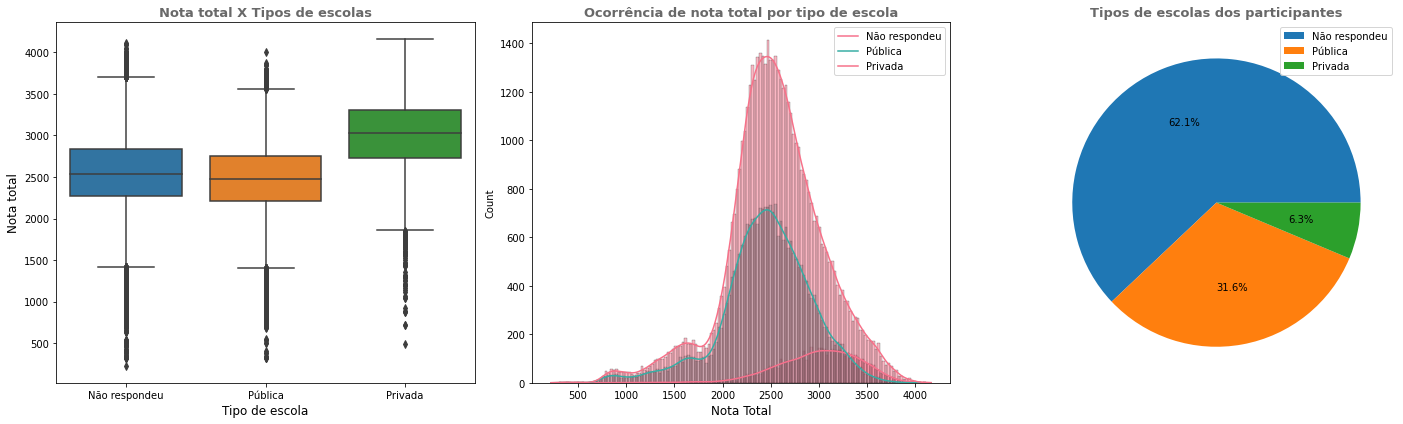

In [ ]:
# CREATING TWO PLOTS IN THE SAME FIGURE
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))
labels = ['Não respondeu', 'Pública', 'Privada']

# CREATING FIRST PLOT
sns.boxplot(data=data, x=data['TP_ESCOLA'], y=data['NU_NOTA_TOTAL'], ax=ax1)
ax1.set_title('Nota total X Tipos de escolas', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1.set_xticklabels(labels)
ax1.set_xlabel('Tipo de escola', size=12)
ax1.set_ylabel('Nota total', size=12)

# CREATING SECOND PLOT
sns.histplot(data=data, x=data['NU_NOTA_TOTAL'], hue=data['TP_ESCOLA'], kde=True, ax=ax2, palette='husl')
ax2.set_title('Ocorrência de nota total por tipo de escola', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax2.legend(labels)
ax2.set_xlabel('Nota Total', size=12)
# fig2 = plt.figure(figsize=(6,3))
# ax2.set_figure(fig2)

# CREATING THIRD PLOT
ax3.set_title('Tipos de escolas dos participantes', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax3.pie(data['TP_ESCOLA'].value_counts(), autopct='%1.1f%%')
ax3.legend(labels)
fig.tight_layout()

In [ ]:
private_school_participant = data.query('TP_ESCOLA == 3')
public_school_participant = data.query('TP_ESCOLA == 2')

private_mean = round(private_school_participant['NU_NOTA_TOTAL'].mean(), 2)
public_mean = round(public_school_participant['NU_NOTA_TOTAL'].mean(), 2)
difference = round(1 - public_mean/private_mean, 2) * 100

print(f'Participantes de escolas privadas têm média de {private_mean}, enquanto os de escolas públicas têm de {public_mean}. Ou seja, {difference}% a menos.')
print(f'Participants from private schools have mean grade of {private_mean}, while participants from public schools have {public_mean}. That means {difference}% lower.')


Participantes de escolas privadas têm média de 2992.04, enquanto os de escolas públicas têm de 2454.38. Ou seja, 18.0% a menos.
Participants from private schools have mean grade of 2992.04, while participants from public schools have 2454.38. That means 18.0% lower.


**Conclusão**

Novamente, existe muito menos participantes que responderam a esta pergunta do que os que afirmaram se vieram de escolas públicas ou privadas, o que pode ter distorcido o resultado. Porém, fazendo a comparação com os alunos que responderam vimos que **a média da nota de participantes que vieram de escolas privadas é 18% maior do que de escolas públicas**, o que mostra uma diferença considerável.

Again, there are way less participants who answered to this question than the ones who claims whether they came from public or private schools, which could have distorted the result. However, comparing the ones who answered we see that **the mean of the total grade from private schools participants are 18% higher than public schools participants**, which is a considerable difference.

# Hipótese 3: As escolas com administração federal tem as melhores notas entre as públicas

In [ ]:
# Removing participants with 0 total grades
data = data.query('NU_NOTA_TOTAL != 0')

# Only considering participants who answered about their school's administration type
data_with_school_adm = data.dropna(subset=['TP_DEPENDENCIA_ADM_ESC'])

school_adm_counts = data_with_school_adm.value_counts('TP_DEPENDENCIA_ADM_ESC')

# Changing the indexes of the Series to its correct names
school_adm_series = school_adm_counts.rename({
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
})
school_adm_series

TP_DEPENDENCIA_ADM_ESC
Estadual     19529
Privada       4024
Federal       1205
Municipal      210
dtype: int64

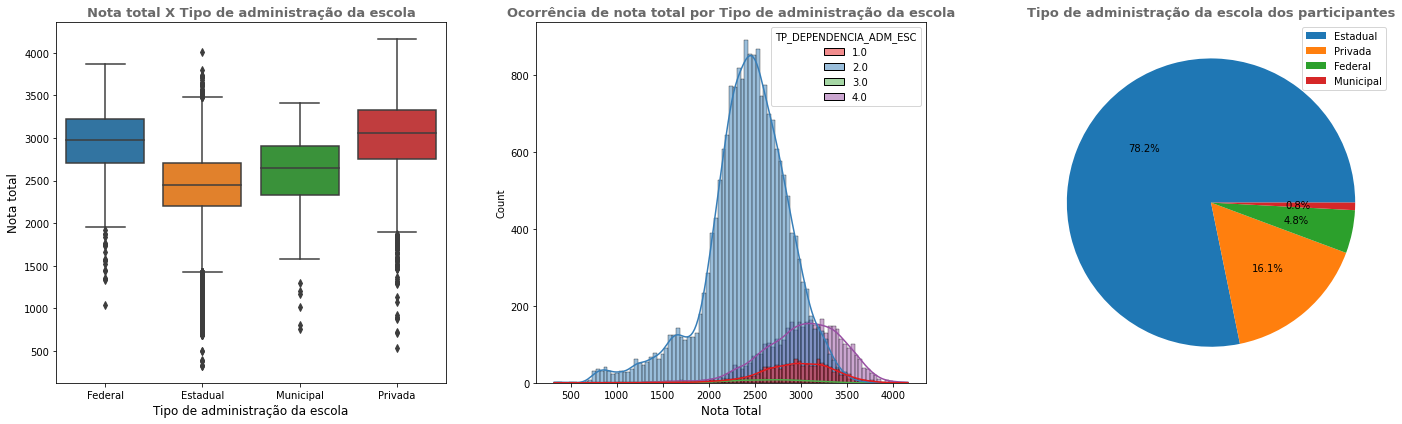

In [ ]:
# SETTING THE VARIABLES TO CREATE PLOTS
ordered_labels = ['Estadual', 'Privada', 'Federal', 'Municipal']
analysed_field = 'TP_DEPENDENCIA_ADM_ESC'
analysed_field_text = 'Tipo de administração da escola'
labels_dict = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
xlabels = list(labels_dict.values())

# CREATING PLOTS IN THE SAME FIGURE
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))

# CREATING FIRST PLOT
sns.boxplot(data=data, x=data[analysed_field], y=data['NU_NOTA_TOTAL'], ax=ax1)
ax1.set_title(f'Nota total X {analysed_field_text}', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax1.set_xticklabels(xlabels)
ax1.set_xlabel(f'{analysed_field_text}', size=12)
ax1.set_ylabel('Nota total', size=12)

# CREATING SECOND PLOT
sns.histplot(data=data, x=data['NU_NOTA_TOTAL'], hue=data[analysed_field], kde=True, ax=ax2, palette="Set1")
ax2.set_title(f'Ocorrência de nota total por {analysed_field_text}', fontsize = 13, color ='dimgrey', fontweight = 'bold')
# ax2.legend(xlabels)
ax2.set_xlabel('Nota Total', size=12)

# CREATING THIRD PLOT
ax3.set_title(f'{analysed_field_text} dos participantes', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax3.pie(data[analysed_field].value_counts(), autopct='%1.1f%%')
ax3.legend(ordered_labels)
fig.tight_layout()

In [ ]:
federal_school_participant = data.query('TP_DEPENDENCIA_ADM_ESC == 1')
private_school_participant = data.query('TP_DEPENDENCIA_ADM_ESC == 4')

federal_mean = round(federal_school_participant['NU_NOTA_TOTAL'].mean(), 2)
private_mean = round(private_school_participant['NU_NOTA_TOTAL'].mean(), 2)
difference = round(1 - federal_mean/private_mean, 2) * 100

print(f'Participantes de escolas públicas federais têm média de {federal_mean}, enquanto os de escolas privadas têm de {private_mean}. Ou seja, somente {difference}% a menos.')
print(f'Participants from federal public schools have mean grade of {federal_mean}, while participants from private schools have {private_mean}. That means only {difference}% lower.')

Participantes de escolas públicas federais têm média de 2945.21, enquanto os de escolas privadas têm de 3017.05. Ou seja, somente 2.0% a menos.
Participants from federal public schools have mean grade of 2945.21, while participants from private schools have 3017.05. That means only 2.0% lower.


Como podemos ver no Boxplot, **as notas dos participantes de escolas públicas federais são realmente maiores que as públicas estaduais e municipais**, confirmando a hipótese levantada. O que é interessante notar também é que **a média da nota dos participantes de escolas federais é bem próxima dos participantes de escolas privadas**.

As we can see in the Boxplot, **the grades of participants from federal public schools are higher than the state and municipal public schools participants**, confirming the hypothesis raised. What is also interesting to note is that **the average grade of participants in federal schools is very close to that of participants in private schools**. 

# Hipótese 4: Quanto maior o grau de instrução dos pais maior a nota do candidato




In [ ]:
data.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,SG_UF_RESIDENCIA,Q001,Q002,Q006,NU_NOTA_TOTAL
1,NaN,409.3,NaN,375.3,400.0,1,NaN,NaN,M,3,1,0,PA,C,C,B,1184.6
2,423.2,499.1,427.2,441.0,560.0,1,NaN,NaN,F,1,1,0,PA,C,A,C,2350.5
3,426.2,578.1,499.9,551.5,500.0,1,NaN,NaN,F,3,1,0,PA,E,C,B,2555.7
5,559.6,618.7,615.6,607.5,900.0,2,4.0,1.0,F,3,2,0,PA,D,E,C,3301.4
6,391.3,468.7,441.9,537.6,760.0,1,NaN,NaN,F,3,1,0,PA,H,H,C,2599.5


In [ ]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

# https://stackoverflow.com/questions/43585333/seaborn-countplot-set-legend-for-x-values
class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


def create_informative_countplot(column_data, xlabel):
  ''' Create a countplot with labels with the count on top of each patch and the legend outside the plot '''
  plt.figure(figsize=(10,8))
  ax = sns.countplot(column_data, order = column_data.value_counts().index)
  plt.xlabel(xlabel, size=14)


  key_labels = list(labels_dict.keys())
  descriptions_labels = list(labels_dict.values())

  # Putting the count value of each patch above it in the countplot
  for p, label in zip(ax.patches, column_data.value_counts().values):
      ax.annotate(label, (p.get_x()+0.25, p.get_height()+200))

  ticks = ax.get_xticklabels()
  labeldic = dict(zip(key_labels, descriptions_labels))
  # print(labeldic)
  # print(ticks)
  # for t in ticks:
  #   print(t)
  labels = [labeldic[h.get_text()]  for h in ticks]
  # print(labels)
  # for z in zip(ticks,ax.patches):
  #   print(z)
  handles = [(h.get_text(),c.get_fc()) for h,c in zip(ticks,ax.patches)]
  print(handles)

  ax.legend(handles, labels, handler_map={tuple : TextHandler()}, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[('E', (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)), ('B', (0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1.0)), ('C', (0.22941176470588232, 0.5705882352941177, 0.22941176470588232, 1.0)), ('D', (0.7534313725490196, 0.23872549019607847, 0.24166666666666664, 1.0)), ('H', (0.5784313725490194, 0.446078431372549, 0.6990196078431372, 1.0)), ('F', (0.5171568627450981, 0.3583333333333334, 0.3259803921568628, 1.0)), ('A', (0.8372549019607844, 0.5196078431372548, 0.7401960784313724, 1.0)), ('G', (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0))]


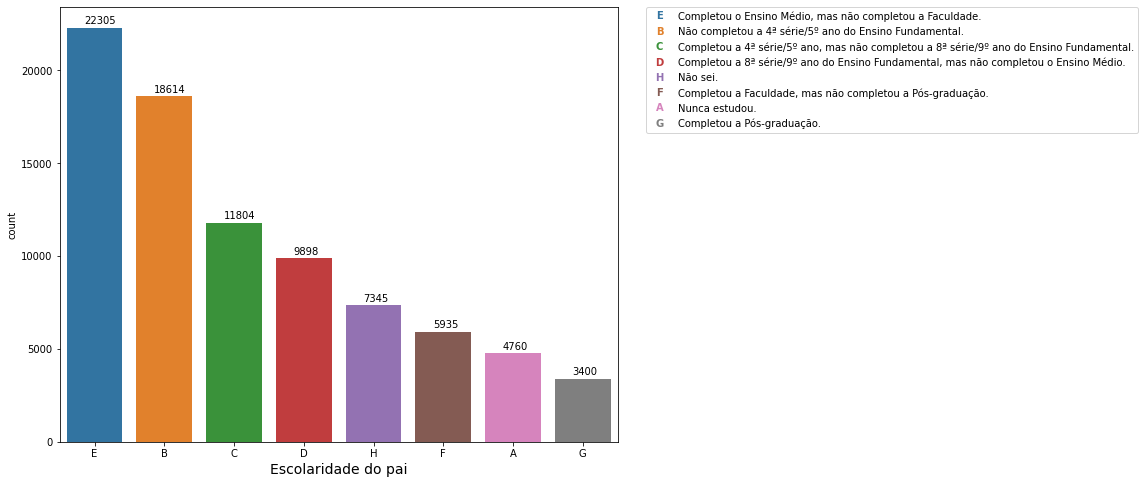

In [ ]:
create_informative_countplot(data['Q001'], 'Escolaridade do pai')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[('E', (0.19460784313725488, 0.45343137254901944, 0.632843137254902, 1.0)), ('B', (0.8818627450980391, 0.5053921568627451, 0.17303921568627467, 1.0)), ('C', (0.22941176470588232, 0.5705882352941177, 0.22941176470588232, 1.0)), ('D', (0.7534313725490196, 0.23872549019607847, 0.24166666666666664, 1.0)), ('F', (0.5784313725490194, 0.446078431372549, 0.6990196078431372, 1.0)), ('G', (0.5171568627450981, 0.3583333333333334, 0.3259803921568628, 1.0)), ('A', (0.8372549019607844, 0.5196078431372548, 0.7401960784313724, 1.0)), ('H', (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0))]


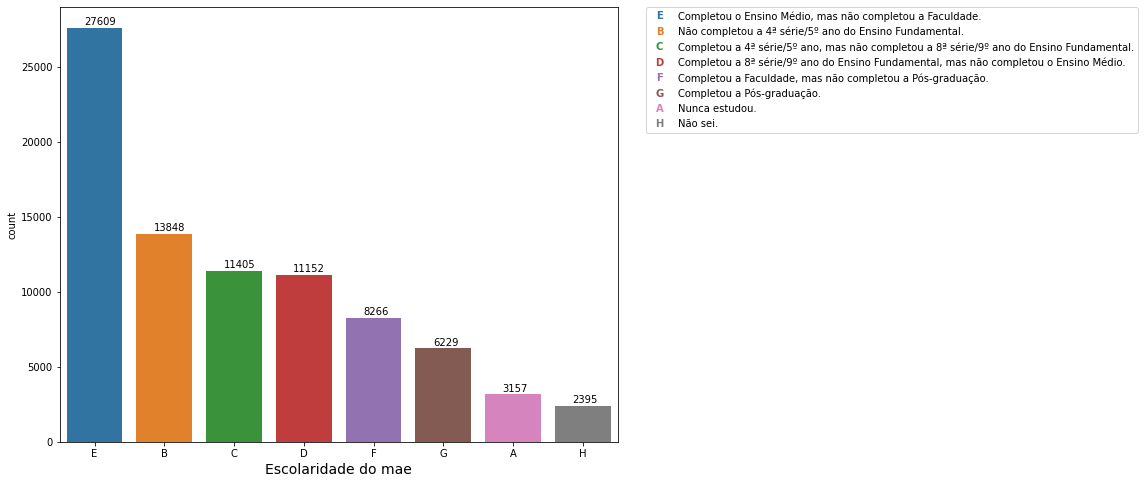

In [ ]:
create_informative_countplot(data['Q002'], 'Escolaridade do mae')

In [ ]:
def create_informative_boxplot(column_to_group, column_for_result, xlabel, ylabel):
  # Grouping by Q001 field and getting the mean value of each group for the NU_NOTA_TOTAL
  education_levels_median_grade = data.groupby(column_to_group)[column_for_result].median()

  # List of the educations levels to order the boxplot
  ordered_education_levels_median_grade = education_levels_median_grade.sort_values(ascending=True)

  ordered_education_levels = list(ordered_education_levels_median_grade.index)

  plt.figure(figsize=(10,8))
  plot = sns.boxplot(x=data[column_to_group], y=data[column_for_result], order=ordered_education_levels)
  plt.xlabel(xlabel, size=14)
  plt.ylabel(ylabel, size=14)

  # medians = tips.groupby(['day'])['total_bill'].median()
  vertical_offset = data[column_for_result].median() * 0.05 # offset from median for display

  for xtick in plot.get_xticks():
      plot.text(xtick,ordered_education_levels_median_grade[xtick] + vertical_offset,round(ordered_education_levels_median_grade[xtick], 2), 
              horizontalalignment='center',size='small',color='w',weight='semibold')

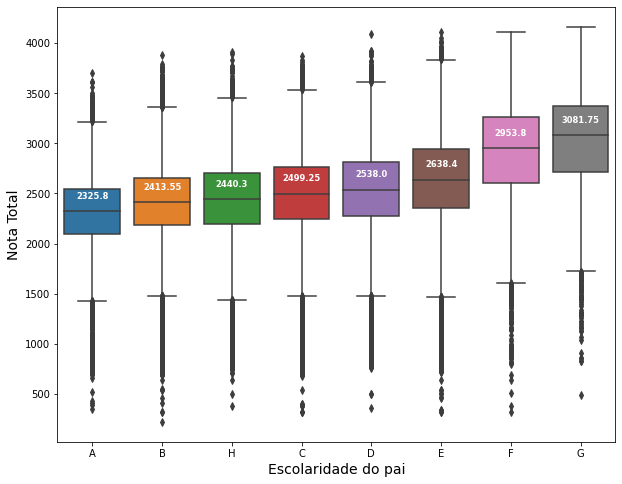

In [ ]:
create_informative_boxplot('Q001', 'NU_NOTA_TOTAL', 'Escolaridade do pai', 'Nota Total')

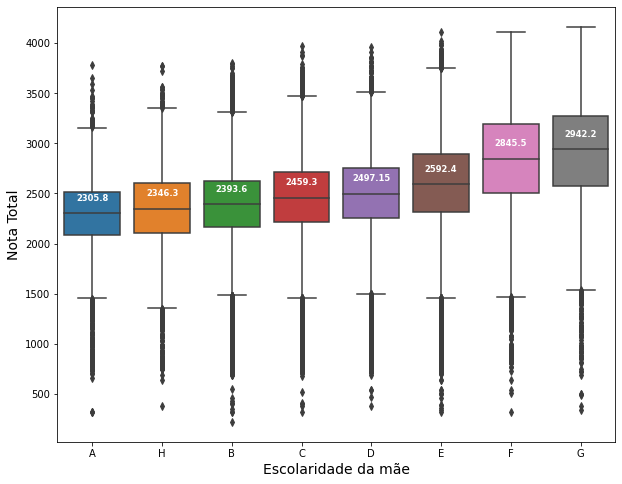

In [ ]:
create_informative_boxplot('Q002', 'NU_NOTA_TOTAL', 'Escolaridade da mãe', 'Nota Total')

In [ ]:
# Changing the values of Q001 and Q002 to numbers to try to see the correlation of each field with the NU_NOTA_TOTAL
# Since the values of these columns are string ('A', 'B'...) it doesnt work with the correlation matrix since its not a number

education_level_mapping = {
    'A': 1,
    'H': 2,
    'B': 3,
    'C': 4,
    'D': 5,
    'E': 6,
    'F': 7,
    'G': 8,
}
data_with_numbers_as_education_levels = data
data_with_numbers_as_education_levels['Q001'] = data_with_numbers_as_education_levels['Q001'].map(education_level_mapping)
data_with_numbers_as_education_levels['Q002'] = data_with_numbers_as_education_levels['Q002'].map(education_level_mapping)
data_with_numbers_as_education_levels.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,TP_ESCOLA,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SEXO,TP_COR_RACA,TP_ST_CONCLUSAO,IN_TREINEIRO,SG_UF_RESIDENCIA,Q001,Q002,Q006,NU_NOTA_TOTAL
1,NaN,409.3,NaN,375.3,400.0,1,NaN,NaN,M,3,1,0,PA,4,4,B,1184.6
2,423.2,499.1,427.2,441.0,560.0,1,NaN,NaN,F,1,1,0,PA,4,1,C,2350.5
3,426.2,578.1,499.9,551.5,500.0,1,NaN,NaN,F,3,1,0,PA,6,4,B,2555.7
5,559.6,618.7,615.6,607.5,900.0,2,4.0,1.0,F,3,2,0,PA,5,6,C,3301.4
6,391.3,468.7,441.9,537.6,760.0,1,NaN,NaN,F,3,1,0,PA,2,2,C,2599.5


In [ ]:
# Removing participants that dont know the education level of their parents to not influence the correlation result
print(data_with_numbers_as_education_levels.shape)

# The ones who doesnt know their parents' education level responded with H which was mapped to 2
data_with_numbers_as_education_levels = data_with_numbers_as_education_levels.query('Q001 != "2" or Q002 != "2"')
print(data_with_numbers_as_education_levels.shape)

(84061, 17)
(82413, 17)


In [ ]:
corr_matrix = data_with_numbers_as_education_levels[['Q001', 'Q002', 'NU_NOTA_TOTAL']].corr()
corr_matrix.columns = ['Escolaridade do pai', 'Escolaridade da mãe', 'Nota Total']
corr_matrix

,Escolaridade do pai,Escolaridade da mãe,Nota Total
Q001,1.000000,0.529307,0.319001
Q002,0.529307,1.000000,0.316629
NU_NOTA_TOTAL,0.319001,0.316629,1.000000


**Conclusão**

Pudemos ver que **quanto maior o grau de escolaridade do pai ou da mãe do participante maior será a sua nota total no exame**, confirmando a nossa hipótese. Também é interessante notar que a partir da matriz de correlação pudemos ver que **há uma pequena diferença a mais na correlação da escolaridade do pai comparada com a da mãe**, o que também já é possível ser observado nas medianas de cada grau de escolaridade no boxplot.

We could see that **the higher the level of education of the participant's father or mother, the higher the total grade in the exam**, confirming our hypothesis. It is also interesting to note that from the correlation matrix we could see that **there is a small difference in the correlation of the father's education compared to that of the mother**, which is also possible to be observed in the medians of each level of education in the boxplot.